<a href="https://colab.research.google.com/github/AXBOUF/python_visulization/blob/main/FOREIGN_EXCHANGE_RATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Foreign Exchange rate:
You can select few currencies to focus on.
How various currencies are changed over time? (e.g. you can line plot to see the trend for each currency)
You can also group different currencies vs one, e.g. USD – AUD/USD, Euro/USD, etc… So, you can understand if there is any correlation
Exchange rate over one year – Compare few years
Calculate average rate for every year - compare the yearly average fluctuations
'''

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Foreign_Exchange_Rates_updated.csv')
df.head(10)

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,SWITZERLAND - FRANC/US$
0,1/3/2000,1.5172,0.9847,0.6146,1.4465,8.2798,1.5808
1,1/4/2000,1.5239,0.97,0.6109,1.4518,8.2799,1.5565
2,1/5/2000,1.5267,0.9676,0.6092,1.4518,8.2798,1.5526
3,1/6/2000,1.5291,0.9686,0.607,1.4571,8.2797,1.554
4,1/7/2000,1.5272,0.9714,0.6104,1.4505,8.2794,1.5623
5,1/10/2000,1.5242,0.9754,0.6107,1.4568,8.2794,1.5704
6,1/11/2000,1.5209,0.9688,0.6068,1.457,8.2795,1.5605
7,1/12/2000,1.5202,0.9727,0.6073,1.455,8.2796,1.566
8,1/13/2000,1.4954,0.9737,0.6067,1.4495,8.2798,1.5707
9,1/14/2000,1.5004,0.9874,0.6115,1.4497,8.2797,1.5945


In [ ]:

df = df.replace("ND", pd.NA)


df = df.dropna()

In [ ]:
df.describe()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,SWITZERLAND - FRANC/US$
count,5019,5019,5019,5019,5019,5019,5019
unique,5019,2958,2703,2302,3146,2710,3189
top,12/31/2019,1.3943,0.8898,0.64,1.3332,8.2765,0.994
freq,1,8,9,14,8,208,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5019 entries, 0 to 5216
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Time Serie                                 5019 non-null   object
 1   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5019 non-null   object
 2   EURO AREA - EURO/US$                       5019 non-null   object
 3   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5019 non-null   object
 4   CANADA - CANADIAN DOLLAR/US$               5019 non-null   object
 5   CHINA - YUAN/US$                           5019 non-null   object
 6   SWITZERLAND - FRANC/US$                    5019 non-null   object
dtypes: object(7)
memory usage: 313.7+ KB


In [ ]:
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5019 entries, 0 to 5216
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Time Serie                                 5019 non-null   object 
 1   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5019 non-null   float64
 2   EURO AREA - EURO/US$                       5019 non-null   float64
 3   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5019 non-null   float64
 4   CANADA - CANADIAN DOLLAR/US$               5019 non-null   float64
 5   CHINA - YUAN/US$                           5019 non-null   float64
 6   SWITZERLAND - FRANC/US$                    5019 non-null   float64
dtypes: float64(6), object(1)
memory usage: 313.7+ KB


<Axes: >

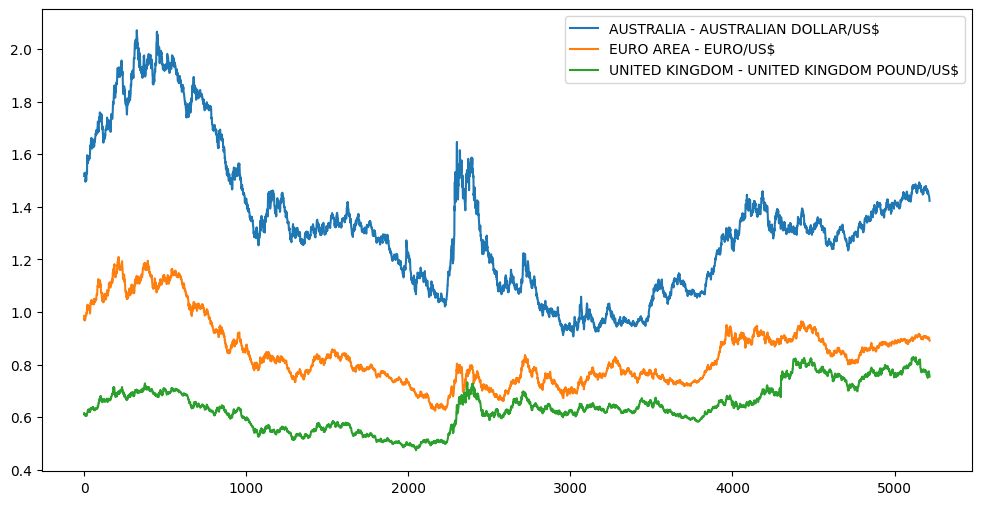

In [ ]:
df[["AUSTRALIA - AUSTRALIAN DOLLAR/US$",
    "EURO AREA - EURO/US$",
    "UNITED KINGDOM - UNITED KINGDOM POUND/US$"]].plot(figsize=(12,6))


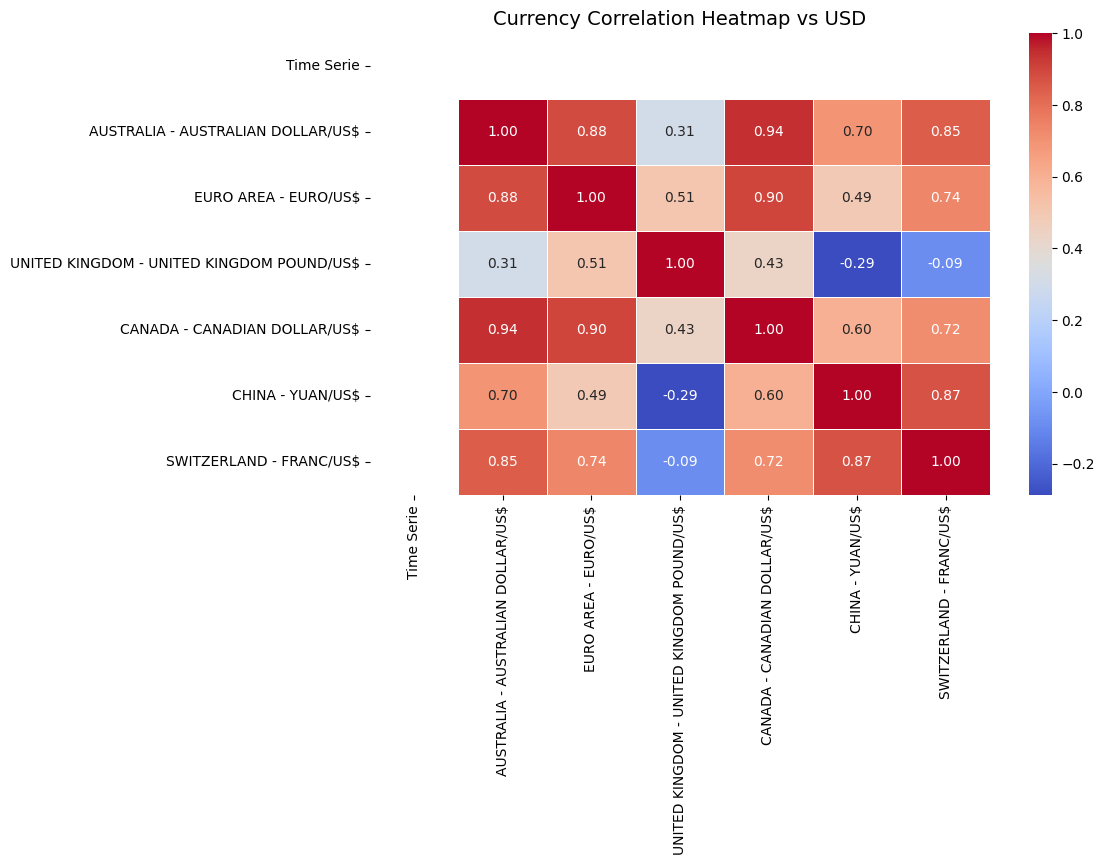

In [ ]:
corr = df['AUSTRALIA - AUSTRALIAN DOLLAR/US$',''].corr()


plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Currency Correlation Heatmap vs USD", fontsize=14)
plt.show()

<Axes: >

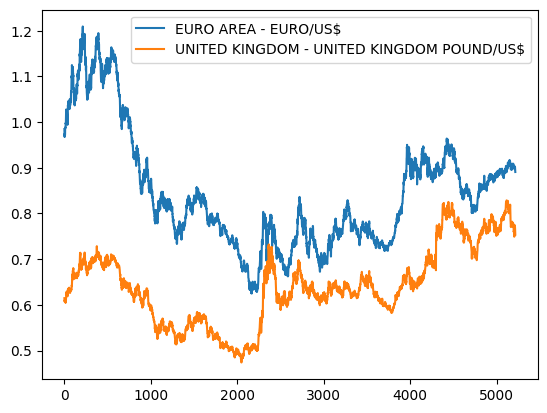

In [ ]:
df[["EURO AREA - EURO/US$", "UNITED KINGDOM - UNITED KINGDOM POUND/US$"]].plot()


In [ ]:
df["Time Serie"] = pd.to_datetime(df["Time Serie"])
df = df.set_index("Time Serie")




In [ ]:

yearly_avg = df.resample("YE").mean()


<Axes: xlabel='Time Serie'>

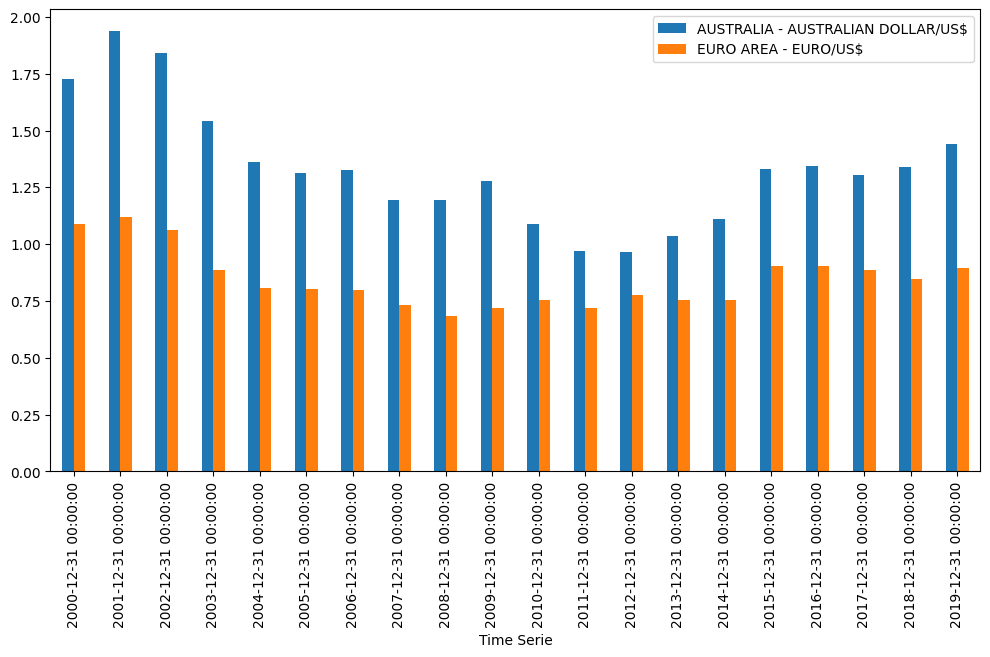

In [ ]:
yearly_avg[["AUSTRALIA - AUSTRALIAN DOLLAR/US$",
            "EURO AREA - EURO/US$"]].plot(kind="bar", figsize=(12,6))


In [ ]:
yearly_pct_change = yearly_avg.pct_change() * 100
print(yearly_pct_change)

            AUSTRALIA - AUSTRALIAN DOLLAR/US$  EURO AREA - EURO/US$  \
Time Serie                                                            
2000-12-31                                NaN                   NaN   
2001-12-31                          12.119960              2.908619   
2002-12-31                          -4.920886             -5.082934   
2003-12-31                         -16.309849            -16.593493   
2004-12-31                         -11.722548             -9.057242   
2005-12-31                          -3.565868             -0.038784   
2006-12-31                           1.230933             -0.980655   
2007-12-31                         -10.044618             -8.320922   
2008-12-31                           0.008308             -6.550583   
2009-12-31                           7.150248              5.416855   
2010-12-31                         -14.855664              5.011236   
2011-12-31                         -11.109158             -4.896872   
2012-1

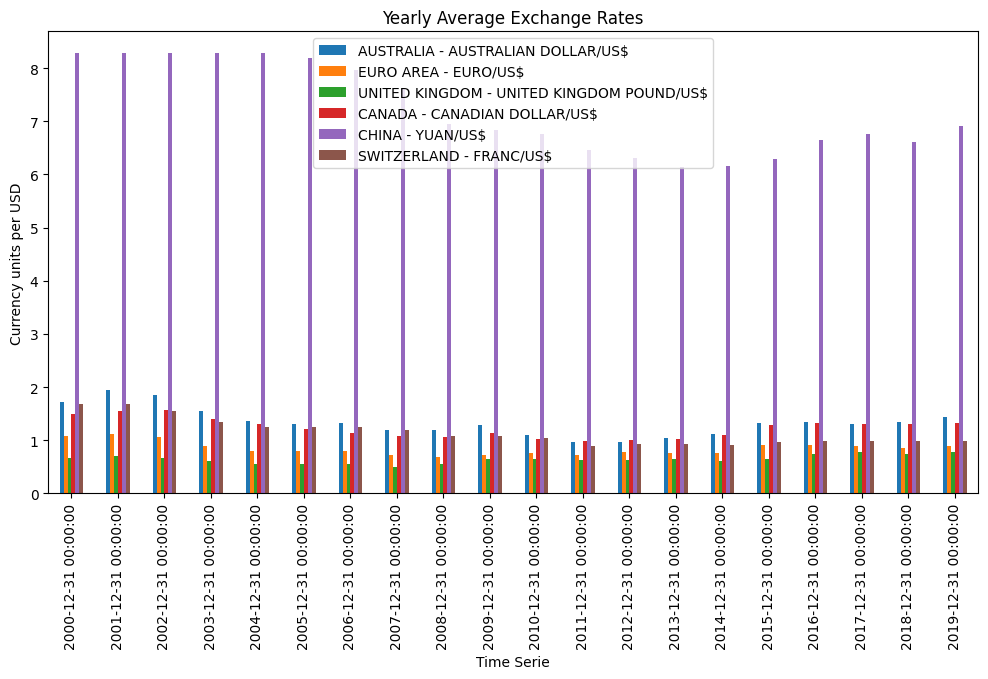

In [ ]:
yearly_avg.plot(kind="bar", figsize=(12,6))
plt.title("Yearly Average Exchange Rates")
plt.ylabel("Currency units per USD")
plt.show()

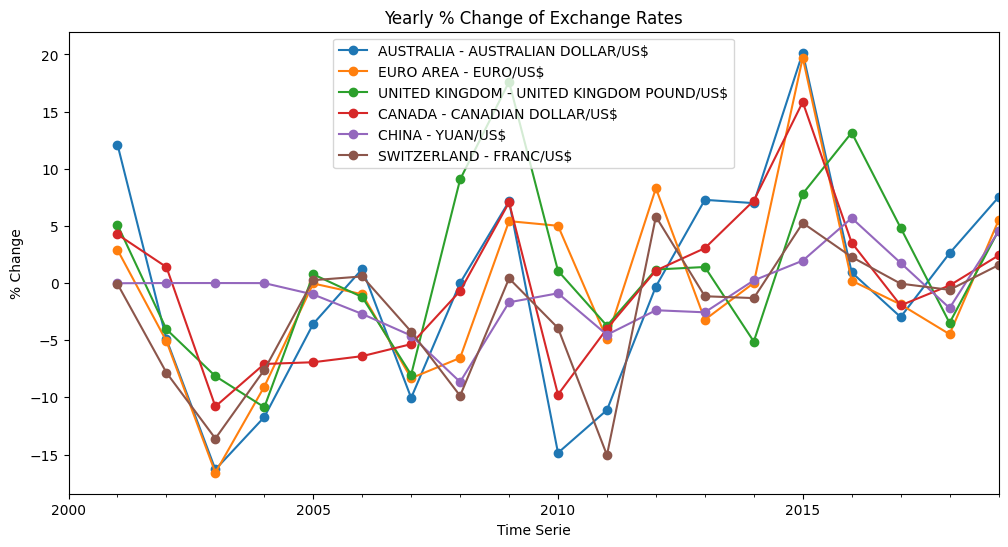

In [ ]:
yearly_pct_change.plot(figsize=(12,6), marker='o')
plt.title("Yearly % Change of Exchange Rates")
plt.ylabel("% Change")
plt.show()


<Axes: xlabel='Time Serie'>

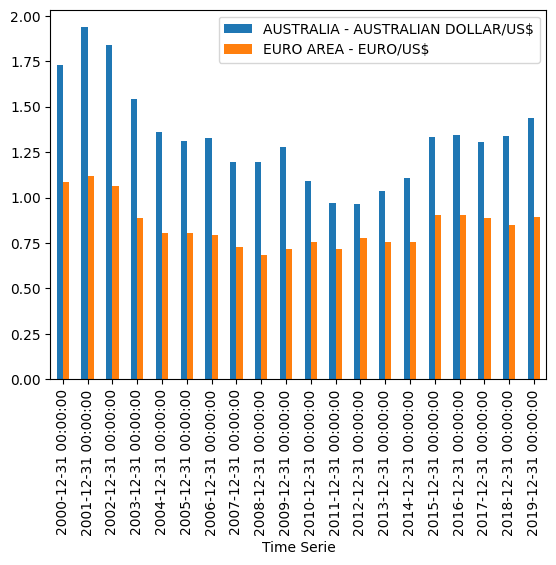

In [ ]:
yearly_avg[["AUSTRALIA - AUSTRALIAN DOLLAR/US$",
            "EURO AREA - EURO/US$"]].plot(kind="bar")
